In [1]:
### So now i am performing EDA on the dataset which i cleaned previously!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
## Loading the cleaned data set!
df=pd.read_csv("Datasets/cars_cleaned.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 1200 non-null   int64  
 1   Company Names              1200 non-null   object 
 2   Cars Names                 1200 non-null   object 
 3   Engines                    1200 non-null   object 
 4   CC/Battery Capacity        1200 non-null   float64
 5   HorsePower                 1200 non-null   float64
 6   Total Speed                1200 non-null   float64
 7   Performance(0 - 100 )KM/H  1200 non-null   float64
 8   Cars Prices                1200 non-null   float64
 9   Fuel Types                 1200 non-null   object 
 10  Seats                      1200 non-null   int64  
 11  Torque                     1200 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 112.6+ KB


In [3]:
## removing unnamed column 
df = df.drop(columns=['Unnamed: 0'])

In [4]:
## Now i want to plot the probability distribution plots!
## so including only numerical columns
numeric_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
numeric_cols

['CC/Battery Capacity',
 'HorsePower',
 'Total Speed',
 'Performance(0 - 100 )KM/H',
 'Cars Prices',
 'Seats',
 'Torque']

C:\Users\ABC\AppData\Local\Temp\ipykernel_14260\3613173094.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\ABC\AppData\Local\Temp\ipykernel_14260\3613173094.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\ABC\AppData\Local\Temp\ipykernel_14260\3613173094.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\ABC\AppData\Local\Temp\ipykernel_14260\3613173094.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
C:\Users\ABC\AppData\Local\Temp\ipykernel_14260\3613

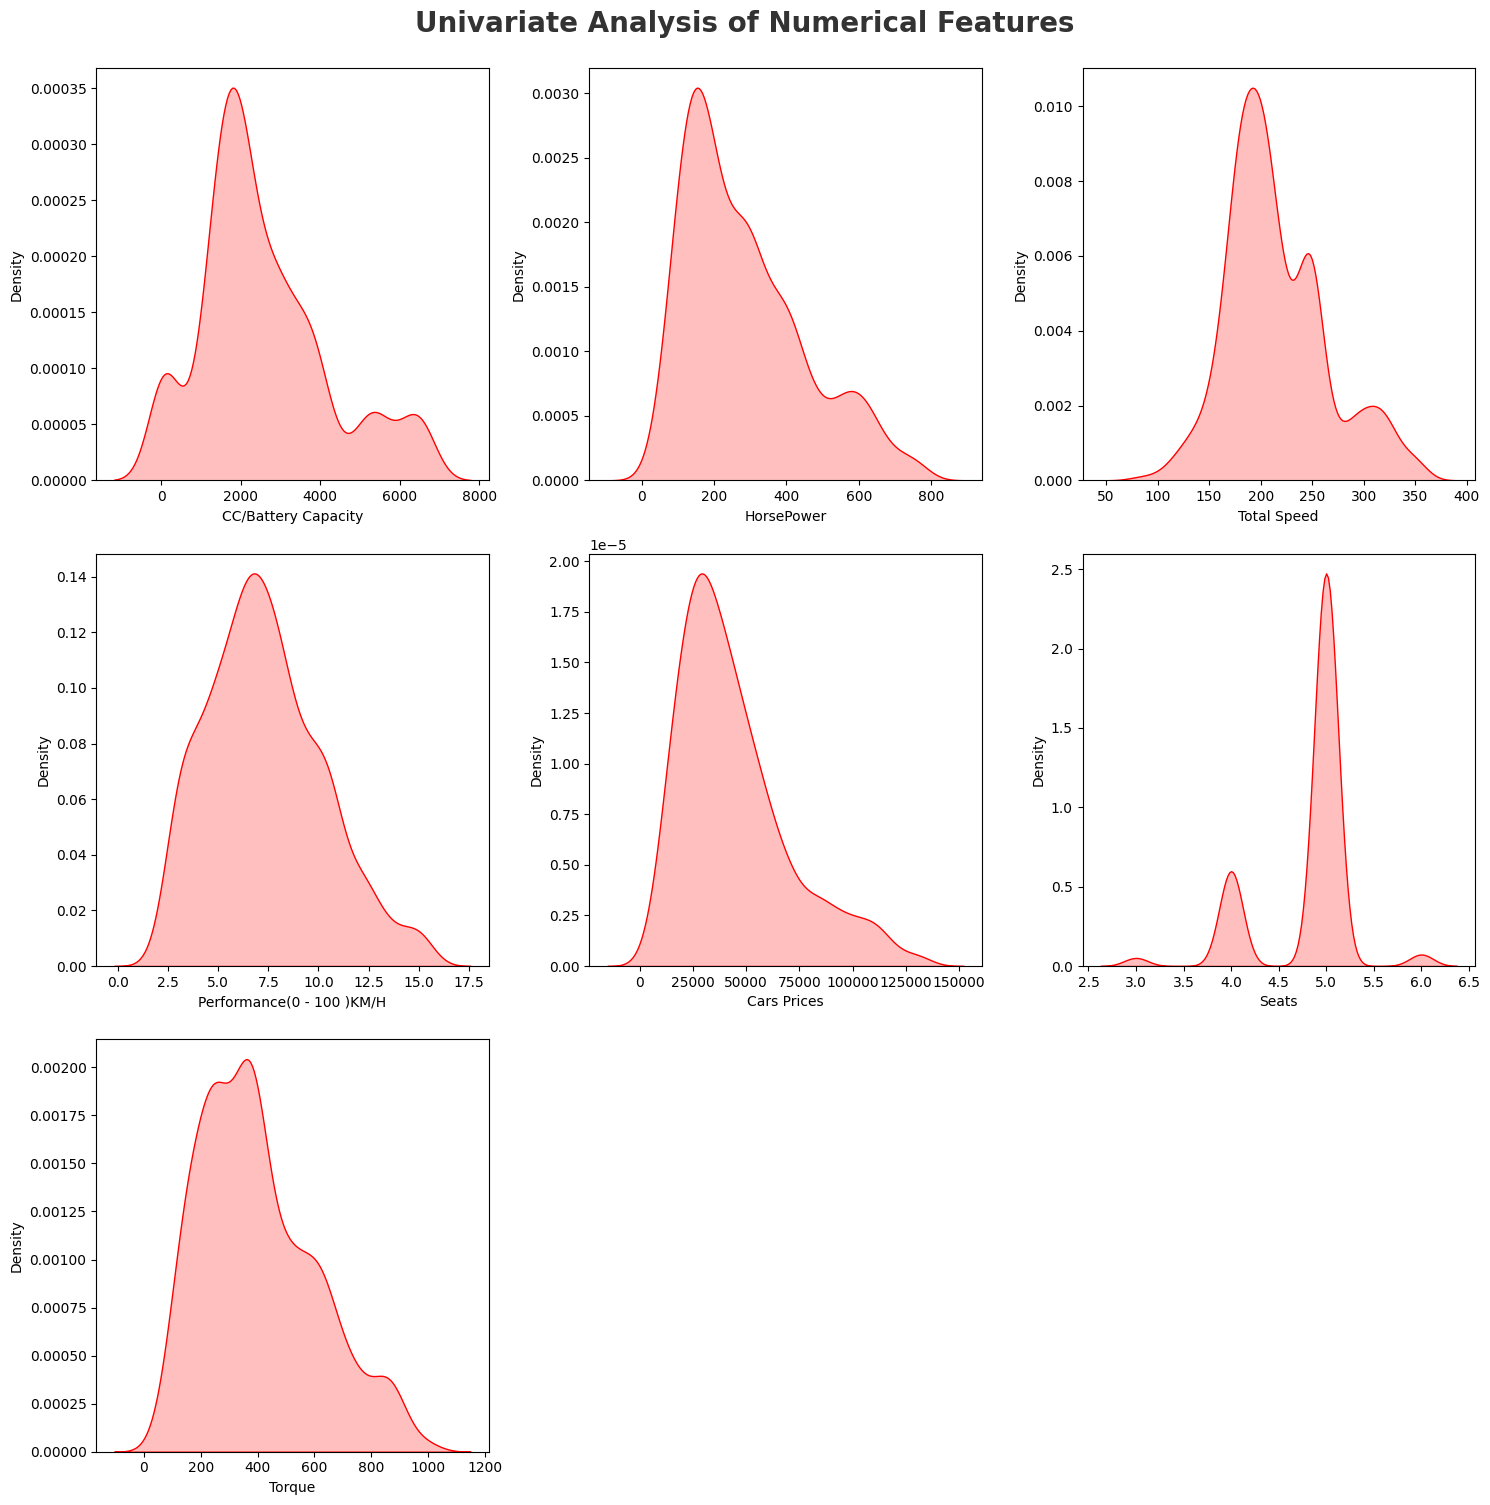

In [5]:
## i want to plot the probability distribution plots
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_cols)):
    q1 = df[numeric_cols[i]].quantile(0.25)
    q2 = df[numeric_cols[i]].quantile(0.75)
    iqr = q2 - q1
    upper_fence=q2+1.5*iqr
    lower_fence=q1-1.5*iqr

    plt.subplot(3, 3, i+1)
    sns.kdeplot(
    x=df[(df[numeric_cols[i]] >= lower_fence) & (df[numeric_cols[i]] <= upper_fence)][numeric_cols[i]],
    shade=True,
    color='r'
    )
    plt.xlabel(numeric_cols[i])
    plt.tight_layout()
    

## Observation
1. Car prices are right skewed.
2. Torques Bell Curve is nearly normal with some small deviations.
3. Total Speed is also appear normal with some deviation.
4. HP is right skewed.
5. 0-100KMH curve also appear normal

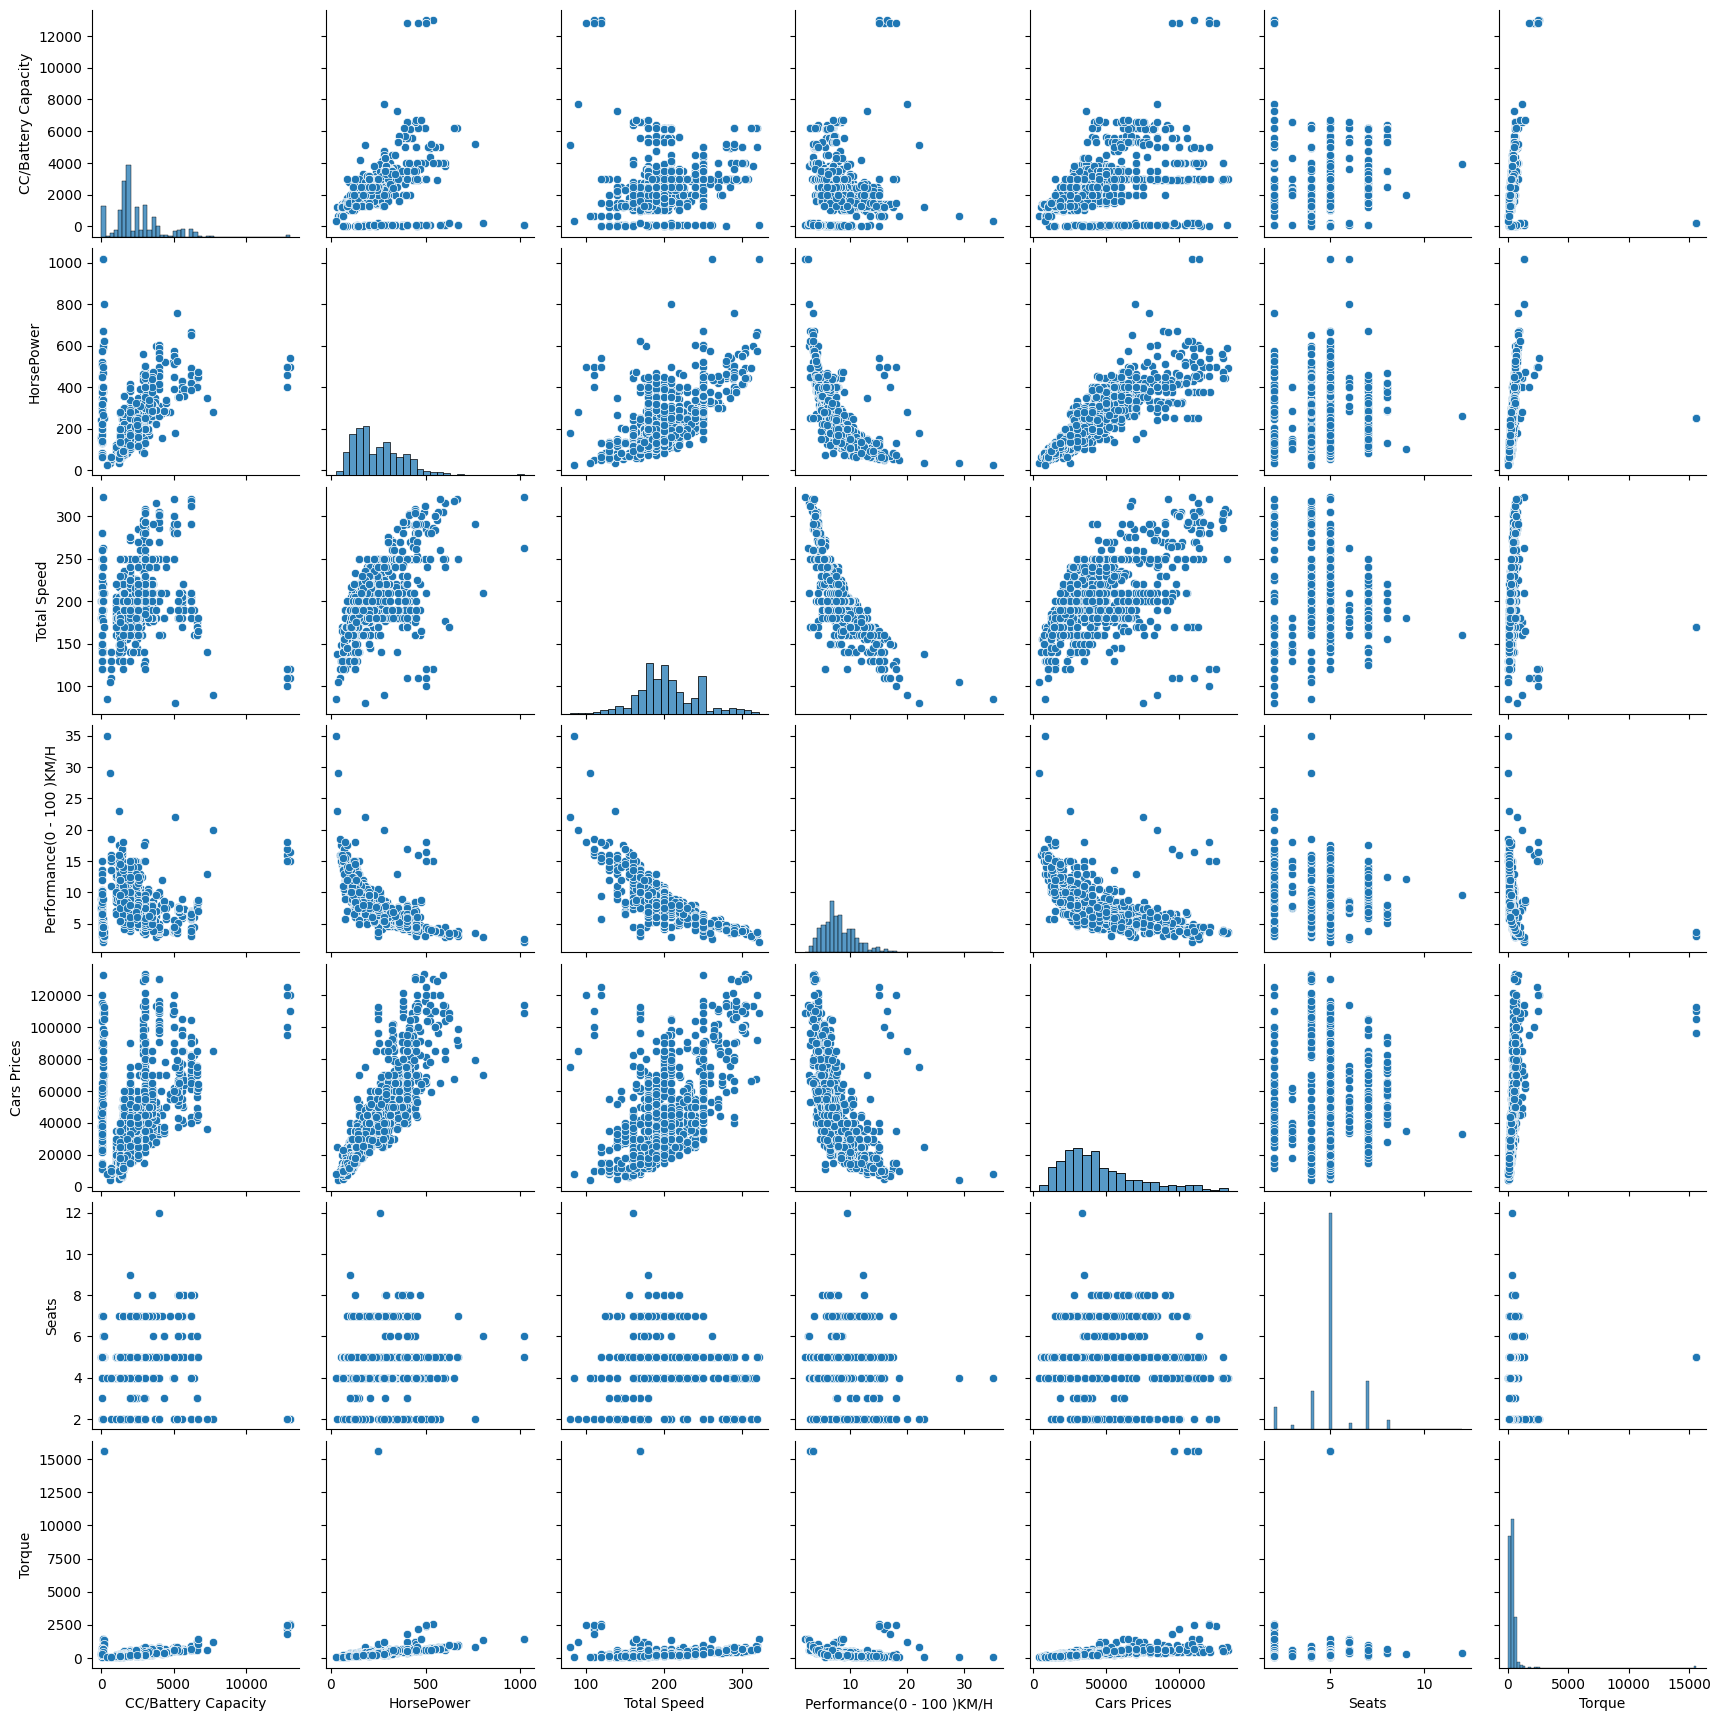

In [7]:
## Removing OUtliers from Car prices for the pairplot
q1=df['Cars Prices'].quantile(0.25)    #### Removing the Outliers in the car prices
q2=df['Cars Prices'].quantile(0.75)
iqr=q2-q1
upper_fence = q2+1.5*iqr
lower_fence = q1-1.5*iqr
df = df[(df['Cars Prices'] >= lower_fence) & (df['Cars Prices'] <= upper_fence)]
sns.pairplot(df)

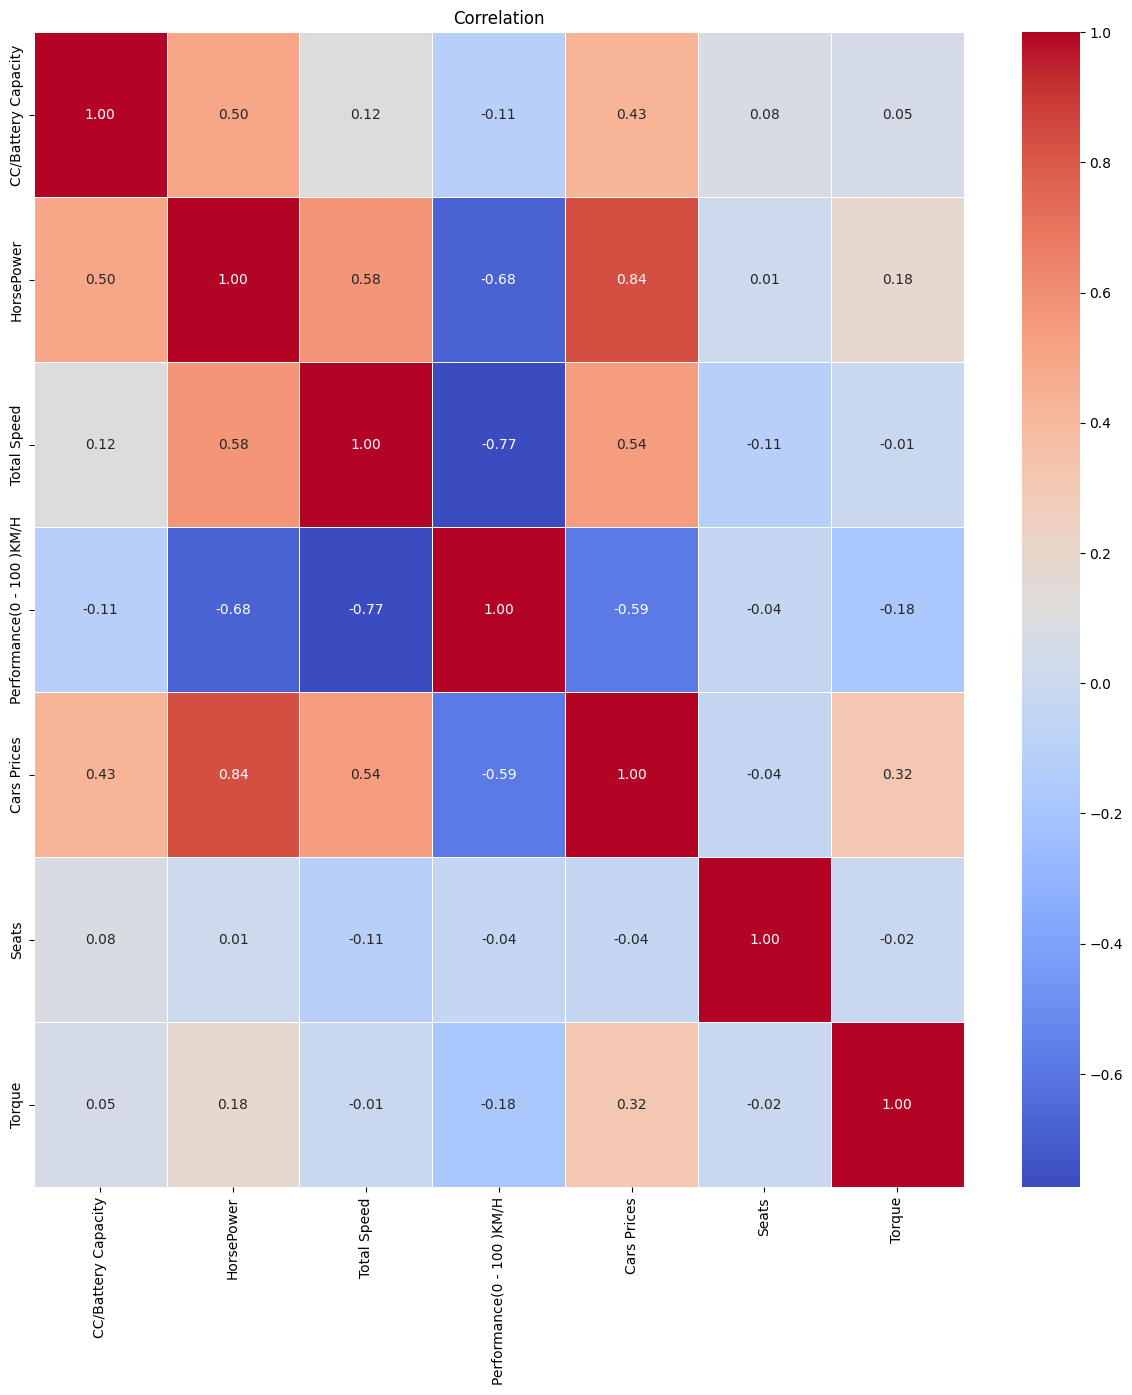

In [10]:
## Correlation
## removing non numeric columns 
corr = df.corr(numeric_only=True)
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation")
plt.show()

## Observation
1. Total Speed and 0-100kmh time are very negatively correalted.
2. Car price and 0-100kmh time are also negatively correlated.
3. 0-100kmh time and Horsepower are also negatively correlated.
4. CC/Battery Capacity, Horsepower, Total Speed, Torque are Positively correlated with price